In [124]:
# importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, Ridge,RidgeCV, ElasticNet,ElasticNetCV,Lasso
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Load the dataset
df = pd.read_csv("/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/wine+quality/winequality-red.csv",sep=";",encoding="UTF-8")

#showing first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<H1>A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? </H1>

In [126]:
# summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
print(df.describe())
print("*"*100)
print(df.shape)
print("*"*100)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<H1>Ans - A</H1>
<H3>
- Total 1949 rows & 10 attributes are presented but some rows contains "N/A" or "NULL" values<br>
- Only Contry Name is Categorical Data<br>
- 'year', Life Ladder', 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect are continues data</H3>

<H1>B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?</H1>

In [128]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

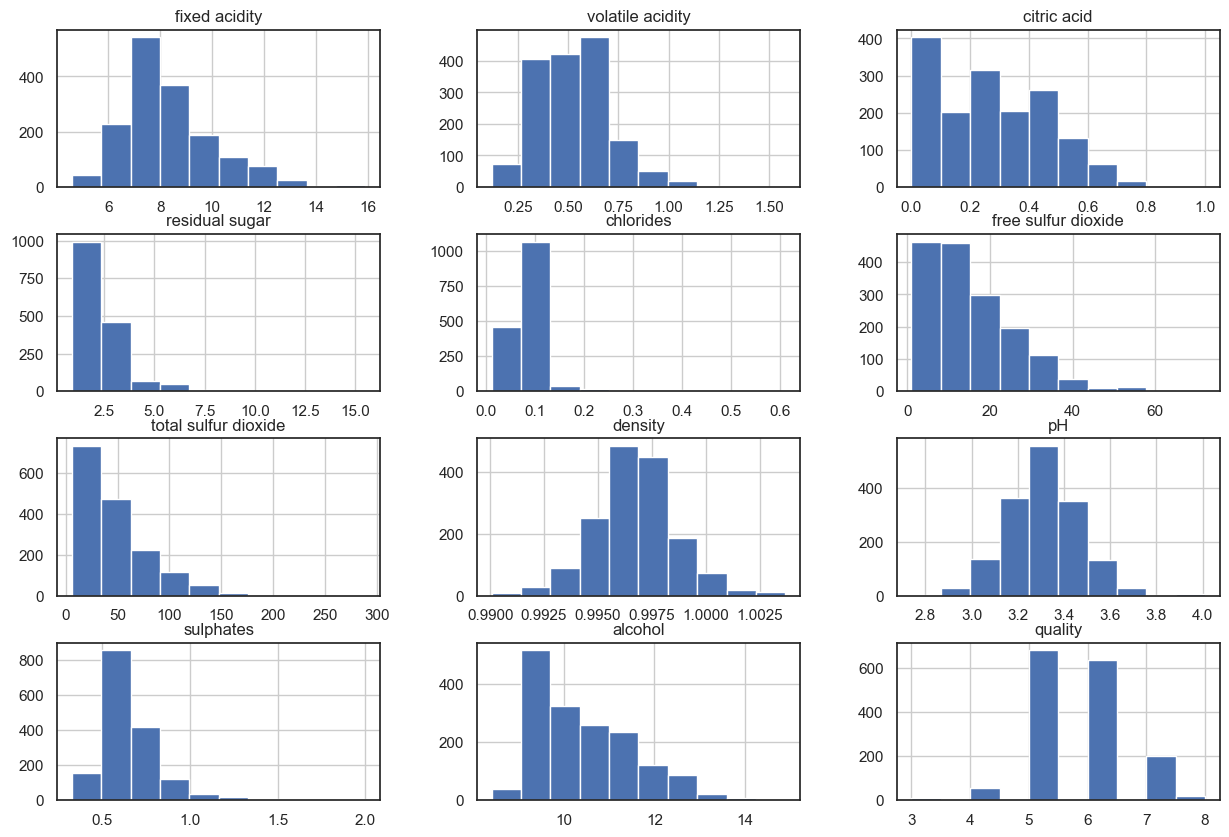

In [129]:
# plotting histogram
%matplotlib inline

df.hist(figsize=(15,10))

In [130]:
df.info()
print("*"*100)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
****************************************************************************************************


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<H1>Ans - B</H1>
<H3>
- There are no NA or null values in the dataset <br>
- Since there are no NAs or Null values present, there are no attributes that require any special treatment </H3>

<H1>C] Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.</H1>

In [131]:
#Dropping the Country Name Attribute to remove Categorical Values
df.corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


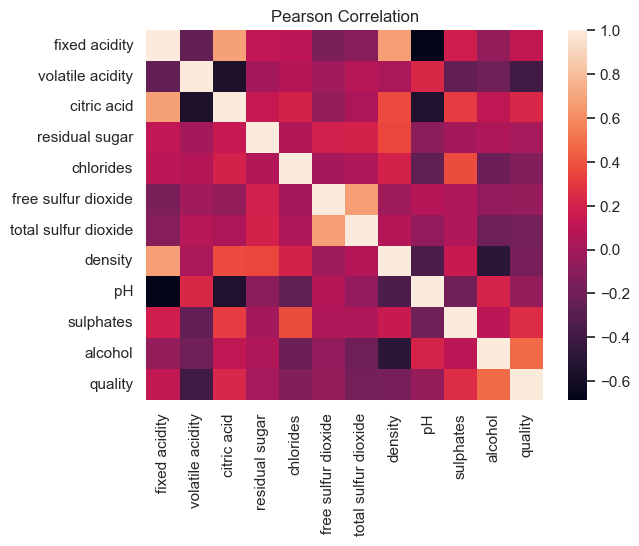

In [132]:
import seaborn as sns

#Making a Heatmap to determine Correlation
sns.set_theme(style="white")
ax = sns.heatmap(df.corr()).set_title("Pearson Correlation")

In [133]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


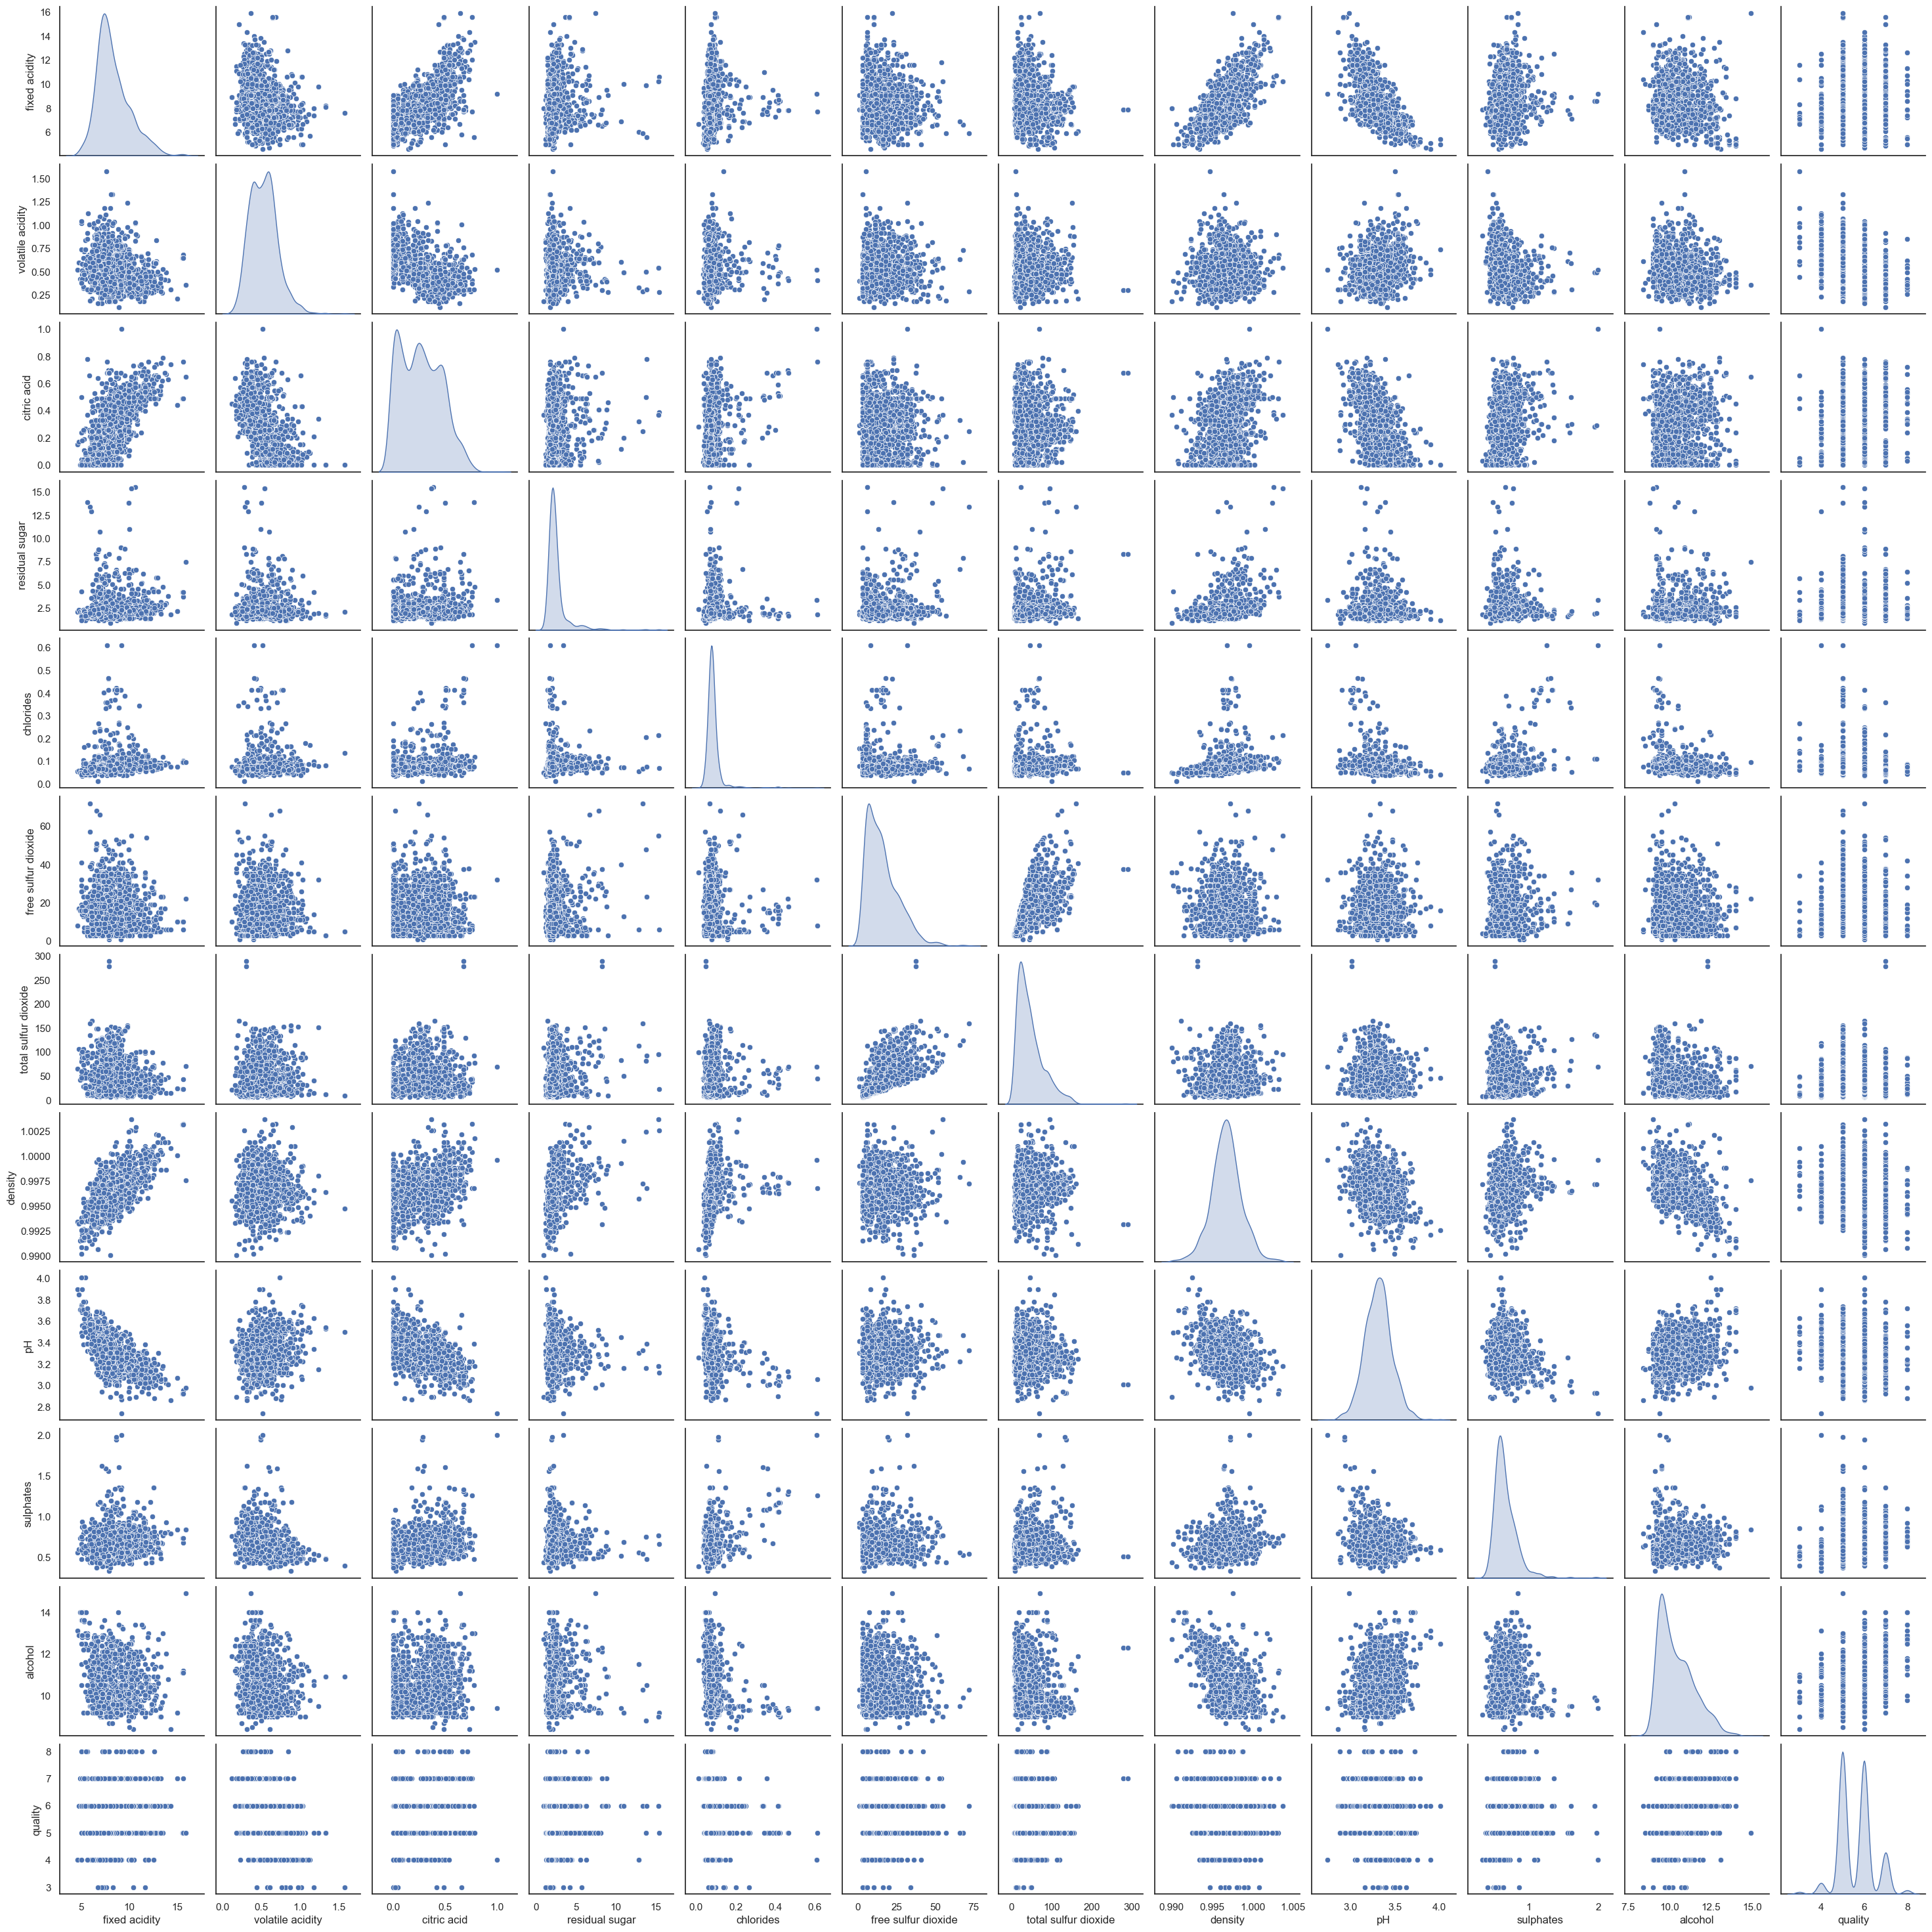

In [134]:
#Plotting Scatter Plots
sns.pairplot(df, diag_kind="kde")

<H1> Ans - C</H1>
<H3>From the plotted scatter plot we can see that Life Ladder has high co-relation with [Log GDP per capita], [Social support], [Healthy life expectancy at birth] 
and all these logically make sense as these are the important factors that contribute to prosperity of nation and thus happiness.</H3>

<H1>D] Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.</H1>

In [135]:
#dropping the 'quality' column as it can be considered as a categorical value
df=df.drop(columns= ['quality'])

#Selecting 'alcohol' as a a label, as it is a continous value
df.corr(method="pearson")['alcohol']

fixed acidity          -0.061668
volatile acidity       -0.202288
citric acid             0.109903
residual sugar          0.042075
chlorides              -0.221141
free sulfur dioxide    -0.069408
total sulfur dioxide   -0.205654
density                -0.496180
pH                      0.205633
sulphates               0.093595
alcohol                 1.000000
Name: alcohol, dtype: float64

In [136]:
#Splitting data into Training & Testing dataset
X = df.drop(columns=['alcohol'])
Y = df['alcohol']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

print(X.head())
print('Shape of X - ', X.shape)

print("*"*100)
print(Y.head())
print('Shape of Y - ', Y.shape)

print("*"*100)
print(x_train.head())
print('Shape of x_train - ',x_train.shape)

print("*"*100)
print(y_train.head())
print('Shape of y_train - ',y_train.shape)

print("*"*100)
print(x_test.head())
print('Shape of x_test - ',x_test.shape)

print("*"*100)
print(y_test.head())
print('Shape of y_test - ',y_test.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  
0                 11.0                  34.0   0.9978  3.51       0.56  
1                 25.0                  67.0   0.9968  3.20       0.68  
2                 15.0                  54.0   0.9970  3.26       0.65  
3                 17.0                  60.0   0.9980  3.16       0.58  
4                 11.0                  34.0   0.9978  3.51       0.56  
Shape of X -  (1599, 10)
********************************************************************

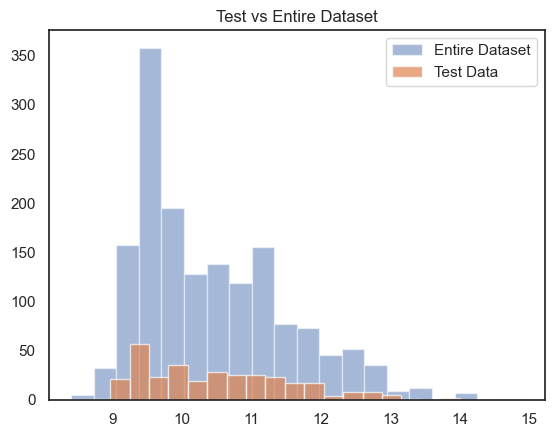

<Figure size 640x480 with 0 Axes>

In [137]:
#Testing if the testing data represents the entire dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Visualize the distribution of Y - the key feature in the entire dataset
plt.hist(Y, bins=20, alpha=0.5, label='Entire Dataset')

# Visualize the distribution of the same feature ('Life Ladder') in the test set
plt.hist(y_test, bins=20, alpha = 0.7, label='Test Data')
plt.title('Test vs Entire Dataset')
plt.legend()
figure(figsize=(8, 6), dpi=80)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

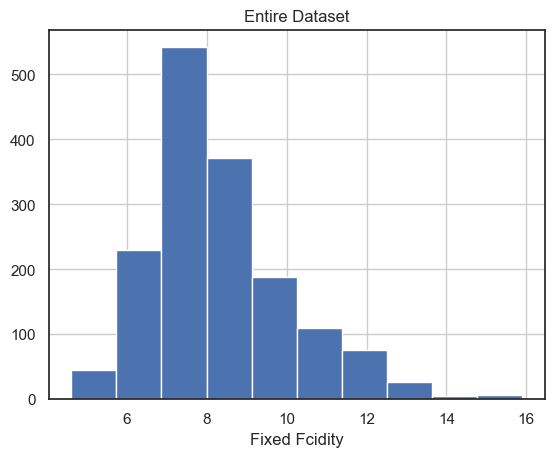

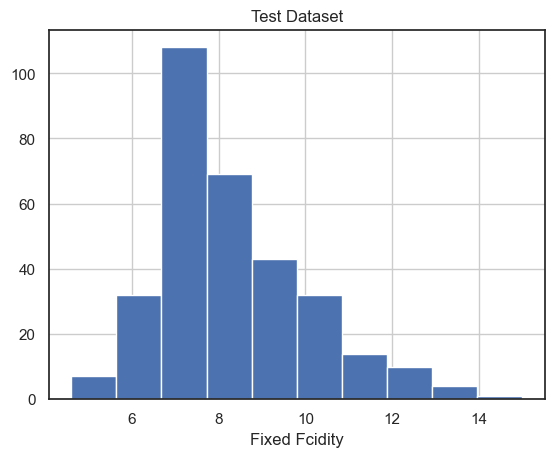

In [138]:
X.hist(column='fixed acidity')
plt.title("Entire Dataset")
plt.xlabel('Fixed Fcidity')
plt.show

x_test.hist(column='fixed acidity')
plt.title("Test Dataset")
plt.xlabel('Fixed Fcidity')
plt.show

<H1>Ans - D</H1>
<H3>Through the graph tittled 'Test vs Entire Dataset' we can see that the Test Data is reporesentative of the entire Dataset, as everybin in the Test Data corresponds to a bin in the entire dataset. We have also tested it with a single attribute 'fixed acidity' and it can be seen from the above graphs tittled Entire Dataset & Test Dataset that the Test Dataset is representative of the entire dataset. </H3>

<H1>E] Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.</H1>

In [139]:
#K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score
#4-fold cv 
# create model
model = LinearRegression()
mymodel = model.fit(x_train,y_train)

#evaluation metric is r2
scores = cross_val_score(mymodel, x_train, y_train, scoring='r2', cv=4)
scores
print('R2: %.3f' % np.mean(scores))
#evaluation metric - negative mean squared error
scores1 = -cross_val_score(mymodel, x_train, y_train, scoring='neg_mean_squared_error', cv=4)
scores1
print('MSE: %.3f' % np.mean(scores1))

R2: 0.652
MSE: 0.390


<H1>Linear Regression:</H1>
<H3>
• Linear regression provided a baseline model for regression tasks.<br>
• The model achieved an MSE of 0.39 and an R-squared (R2) score of 0.65 on the training data.</H3>

In [140]:
x_test.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
1254,7.8,0.7,0.06,1.9,0.079,20.0,35.0,0.99628,3.4,0.69


In [141]:
# Performing Closed Form solution using normal equation

x_closedForm = np.array(X)
y_closedForm = np.array(Y)
x_p = np.c_[np.ones((len(x_closedForm),1)),x_closedForm]

theta = np.linalg.inv(x_p.T.dot(x_p)).dot(x_p.T).dot(y_closedForm)
theta
x_test_1 = np.array([1,7.8,0.7,0.06,1.9,0.079,20.0,35.0,0.99628,3.4,0.69])
#x_test_1 = np.array(x_test.head(1))

print(theta)
y_predict = x_test_1.dot(theta)
y_predict


[ 6.07222609e+02  5.32433095e-01  3.60837746e-01  8.30627496e-01
  2.84410582e-01 -1.46195934e+00 -2.14330209e-03 -2.29579410e-03
 -6.17384804e+02  3.76229342e+00  1.24679232e+00]


10.543629491374782

In [142]:
# Regresion using SGD
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
X = df.drop(columns=['alcohol'])
Y = df['alcohol']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

al = [0.1,0.001,0.0001,1,10]
for i in al:
    sgd = SGDRegressor(loss='squared_error',alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42, eta0 = i)
    sgd.fit(x_train, y_train)
    #sgd = SGDRegressor(alpha=best_params['alpha'], penalty=best_params['penalty'], max_iter=best_params['max_iter'], batch_size=32)
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mse)
    print(f"Root Mean Squared Error for alpha = {i}: {rmse}")
    print(f"Mean Squared Error for alpha = {i}: {mse}")
    print("*"*100)

Root Mean Squared Error for alpha = 0.1: 15818609027787.854
Mean Squared Error for alpha = 0.1: 2.502283915740114e+26
****************************************************************************************************
Root Mean Squared Error for alpha = 0.001: 1.1351691060183715
Mean Squared Error for alpha = 0.001: 1.288608899258549
****************************************************************************************************
Root Mean Squared Error for alpha = 0.0001: 1.229236226482081
Mean Squared Error for alpha = 0.0001: 1.5110217004959061
****************************************************************************************************
Root Mean Squared Error for alpha = 1: 71109172668375.4
Mean Squared Error for alpha = 1: 5.056514437580829e+27
****************************************************************************************************
Root Mean Squared Error for alpha = 10: 1015729569207905.1
Mean Squared Error for alpha = 10: 1.0317065577632766e+30
***********

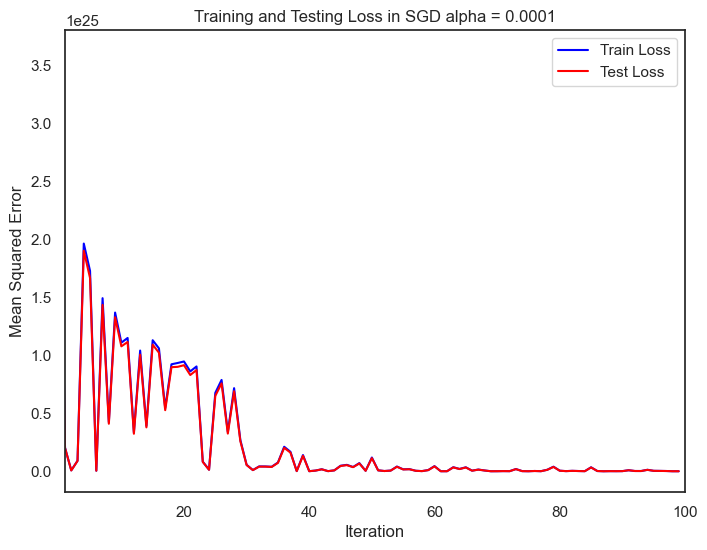

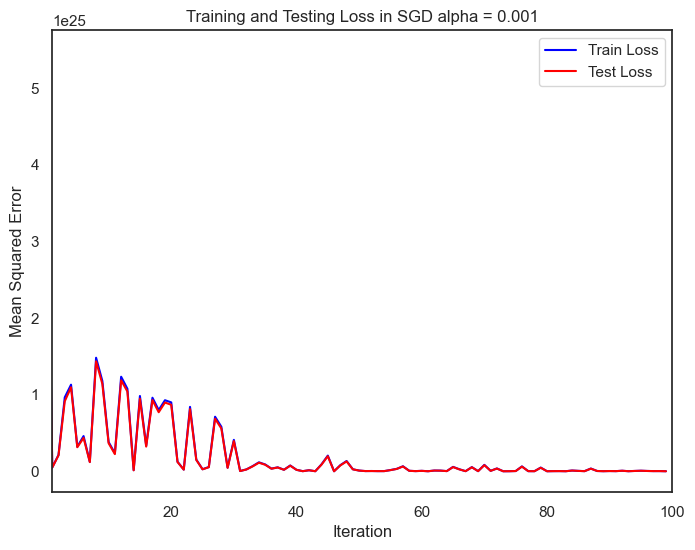

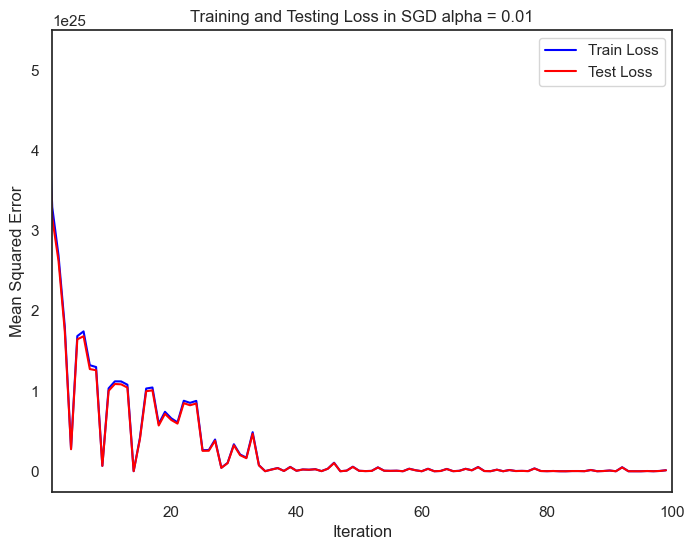

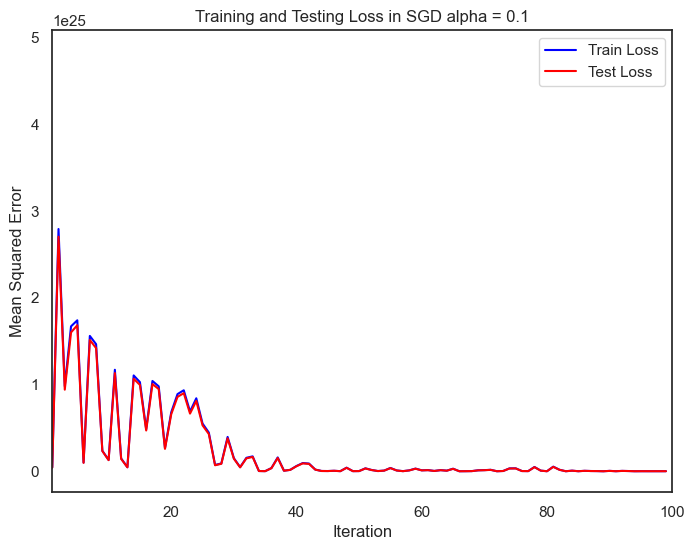

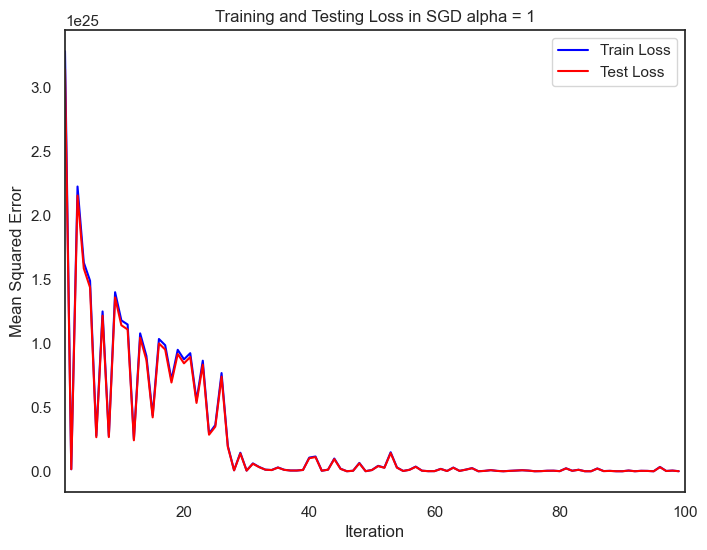

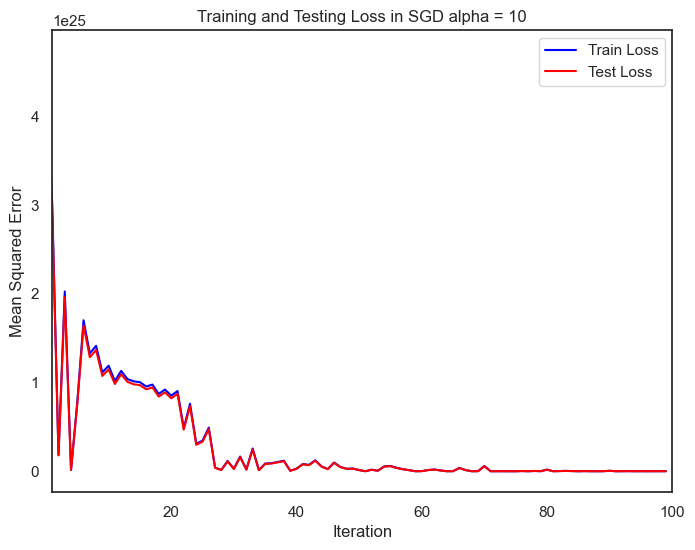

In [143]:
#Plotting the training and validation loss as a function of training iteration -
#Define the SGDRegressor model
#Changing Alpha Values
sgd_al = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for a in sgd_al:
    sgd = SGDRegressor(alpha=a, max_iter=100, random_state=42)

    # Initialize lists to record training and testing loss
    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):
        # Fit the model with one iteration of SGD
        sgd.partial_fit(x_train, y_train)
    
        # Calculate training loss
        y_train_pred = sgd.predict(x_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)
    
        # Calculate testing loss
        y_test_pred = sgd.predict(x_test)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD alpha = {sgd.alpha}')
    plt.show()

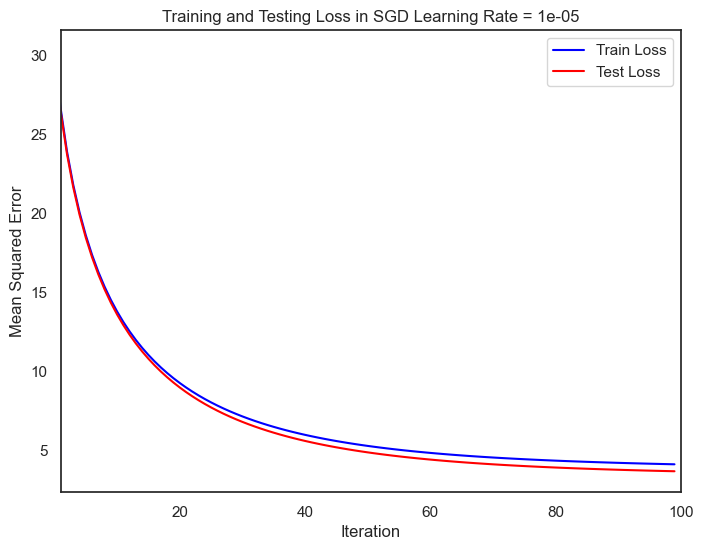

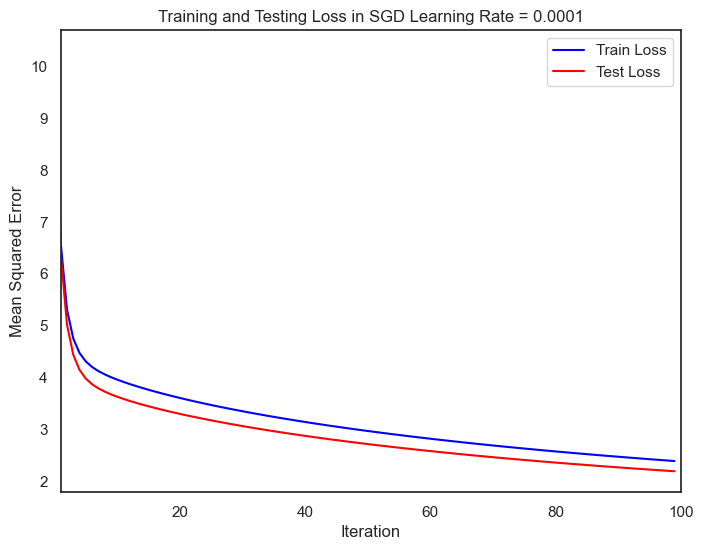

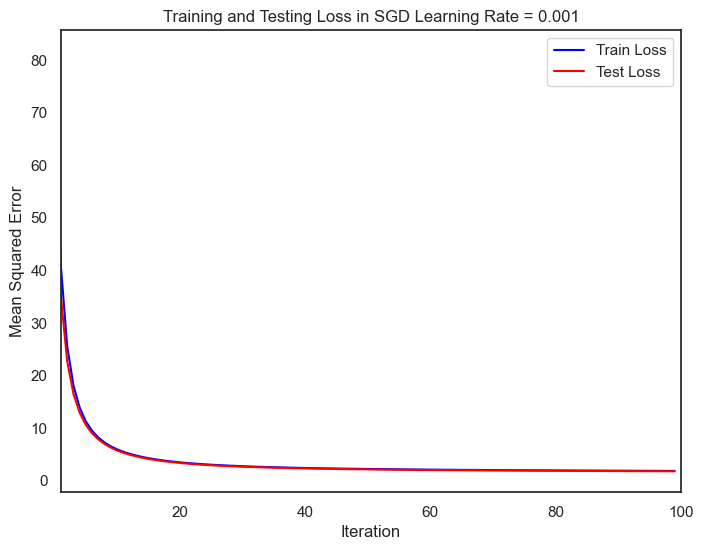

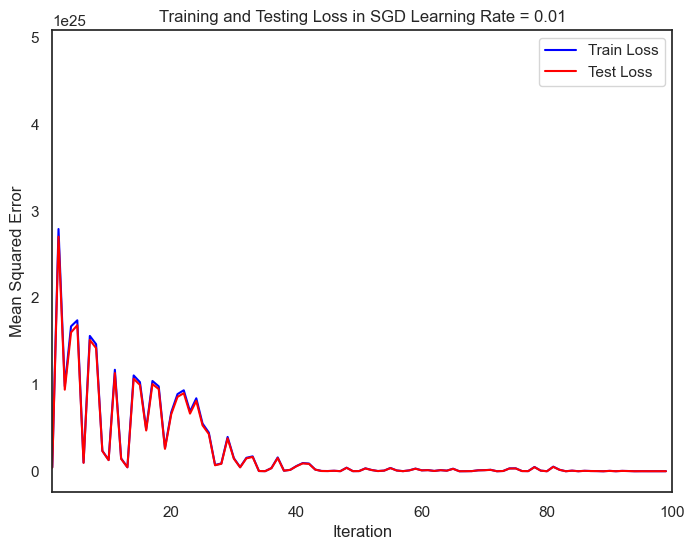

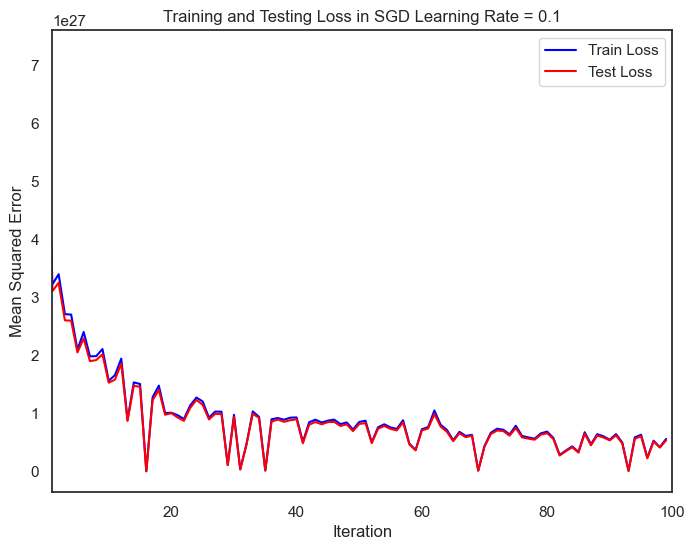

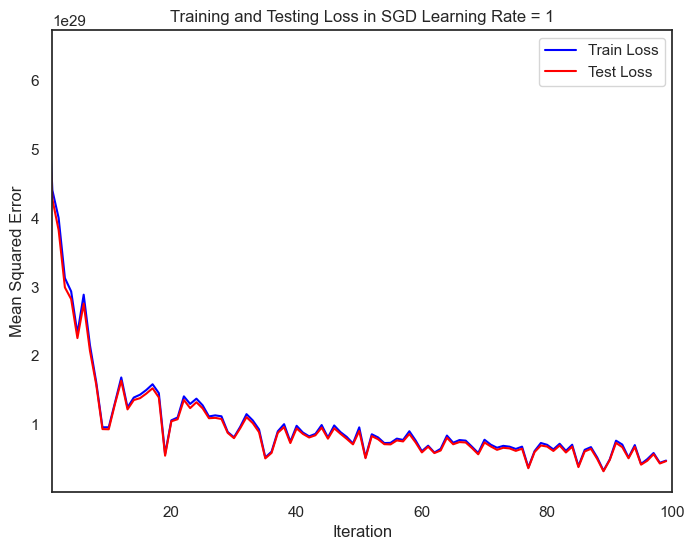

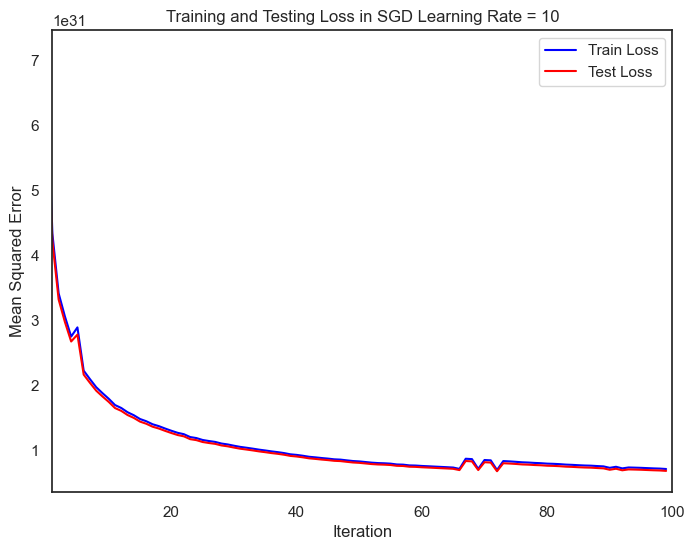

In [144]:
#Plotting the training and validation loss as a function of training iteration -
#Define the SGDRegressor model
#Changing Learning rate
sgd_eta = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for a in sgd_eta:
    sgd = SGDRegressor(alpha=0.1, max_iter=100, random_state=42, eta0=a)

    # Initialize lists to record training and testing loss
    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):
        # Fit the model with one iteration of SGD
        sgd.partial_fit(x_train, y_train)
    
        # Calculate training loss
        y_train_pred = sgd.predict(x_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)
    
        # Calculate testing loss
        y_test_pred = sgd.predict(x_test)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD Learning Rate = {sgd.eta0}')
    plt.show()

<H1>SGD Regression</H1>
<H3>
- While changing the alpha values in the SGD regression, the model is well-generalized, it is not over-fitting, or under-fitting.<br>
- Similarly, while changing learning rate in the SGD rergression, the model is well-generalized for all learning rates except when learning rate is smaller than 0.0001, as some underfitting can be observed.
</H3>

In [145]:
#Ridge Regression with multiple error values (alpha values), using Cross Validation - 
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i],cv = 4).fit(x_train, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))


RidgeCV Model (alpha = 1e-05)............................................

The train score for ridge model is 0.6648399791905003
The train score for ridge model is 0.6840897574445169

RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.6634504198512658
The train score for ridge model is 0.6813787167295131

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.6036726863674917
The train score for ridge model is 0.6086378405436181

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.34903387686708764
The train score for ridge model is 0.31947330309696365

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.25015170872885173
The train score for ridge model is 0.2095044440822007

RidgeCV Model (alpha = 1)............................................

The tra

<H1>Ridge Regression:</H1>
<H3>
- Ridge regression was applied with varying alpha values (penalty terms).<br>
- Higher alpha values (e.g., alpha=10) increased regularization, resulting in a slightly lower test R2 score.<br>
- Ridge regression is effective for preventing overfitting by penalizing large coefficients.
- In the above, the best score is provied when alpha = 0.00001</H3>

In [146]:
#Lasso Regression with multiple error values (alpha values), using Cross Validation - 
#Using Lasso Cross validation

cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]
#Fitting Lasso model for different penalty values
for i in cv:
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(x_train, y_train)
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    #score
    print("The train score for LassoCV model is: ",lasso_cv.score(x_train, y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(x_test, y_test))


LassoCV Model (alpha = 1e-05)............................................

The train score for LassoCV model is:  0.6647872899390437
The test score for LassoCV model is:  0.6838718088807327

LassoCV Model (alpha = 0.0001)............................................

The train score for LassoCV model is:  0.658024657566091
The test score for LassoCV model is:  0.6738346719708013

LassoCV Model (alpha = 0.001)............................................

The train score for LassoCV model is:  0.2357627049114569
The test score for LassoCV model is:  0.19537170907113877

LassoCV Model (alpha = 0.01)............................................

The train score for LassoCV model is:  0.16751773928758495
The test score for LassoCV model is:  0.1595380864057966

LassoCV Model (alpha = 0.1)............................................

The train score for LassoCV model is:  0.04829646625044348
The test score for LassoCV model is:  0.07328656563976155

LassoCV Model (alpha = 1)..................

<H1>Lasso Regression:</H1>
<H3>
- Lasso regression was used with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) led to stronger regularization, reducing both training and test scores significantly.<br>
- Lasso regression not only mitigates overfitting but also performs feature selection by driving some coefficients to zero.
- The best score is obtained for lasso when alpha = 0.00001.</H3>

In [147]:
#Elastic Net Regression with multiple error values (alpha values), using Cross Validation - 
#Using Elastic Net Cross Validation

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elastic Net model for different penalty values
for i in cv:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(x_train, y_train) 
    train_score = model_enet.score(x_train,y_train)
    test_score = model_enet.score(x_test,y_test)
    #score
    print(f"\nElastic Net Model (alpha ={i})............................................\n")
    print("The train score for elastic net model is {}".format(train_score))
    print("The test score for elastic net model is {}".format(test_score))


Elastic Net Model (alpha =0.0001)............................................

The train score for elastic net model is 0.25635158165203187
The test score for elastic net model is 0.21622109284552948

Elastic Net Model (alpha =0.001)............................................

The train score for elastic net model is 0.23288395040337762
The test score for elastic net model is 0.19656015940993166

Elastic Net Model (alpha =0.01)............................................

The train score for elastic net model is 0.17909478140711876
The test score for elastic net model is 0.1681713048395611

Elastic Net Model (alpha =0.1)............................................

The train score for elastic net model is 0.0545158649275056
The test score for elastic net model is 0.07838797540975884

Elastic Net Model (alpha =1)............................................

The train score for elastic net model is 0.03557851951685054
The test score for elastic net model is 0.05248770494917754

Elastic

<H1>Elastic Net Regression:</H1>
<H3>
- Elastic Net regression was employed with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) resulted in lower test R2 scores, indicating stronger regularization.<br>
- Elastic Net combines L1 (Lasso) and L2 (Ridge) penalties, offering a balance between feature selection and coefficient shrinkage.
- The best score of Elastic Net is obtained when alpha = 0.0001.</H3>

<H1>F] Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. </H1>

Mean Squared Error: 0.29280406734482817
Root mean Squared value is: 0.541113728660462
R2 Score: 0.7432518430185948


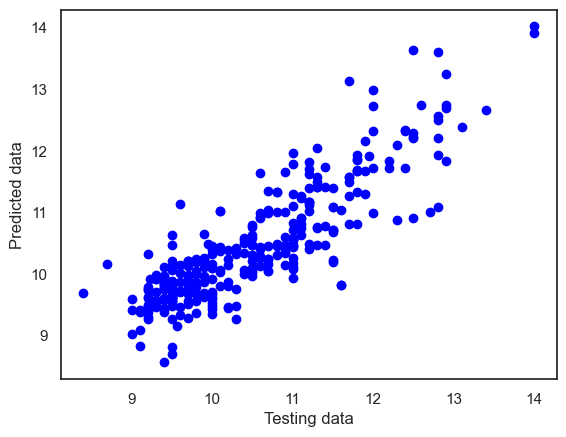

In [148]:
#Polynomial Regression
import math
from sklearn.preprocessing import StandardScaler

df.head()

X = df.drop(columns=['alcohol'])
Y = df['alcohol'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# # Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()

# # Create polynomial features

poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)


# # Initialize and train a linear regression model

model = LinearRegression()
model.fit(X_train_poly, y_train)

# # Make predictions on the test data

y_pred = model.predict(X_test_poly)

# # Calculate and print the Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared value is: {math.sqrt(mse)}")

# from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f"R2 Score: {r2}")

# Plotting the original data and the polynomial regression curve
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Testing data')
plt.ylabel('Predicted data')
plt.show()


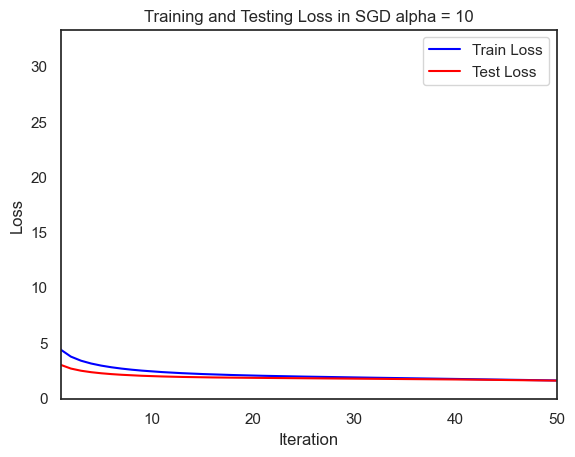

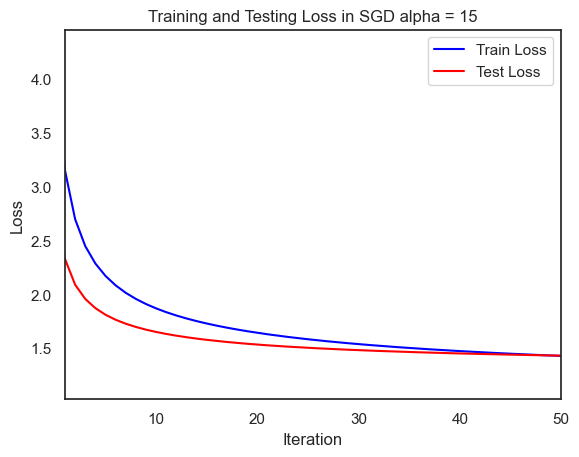

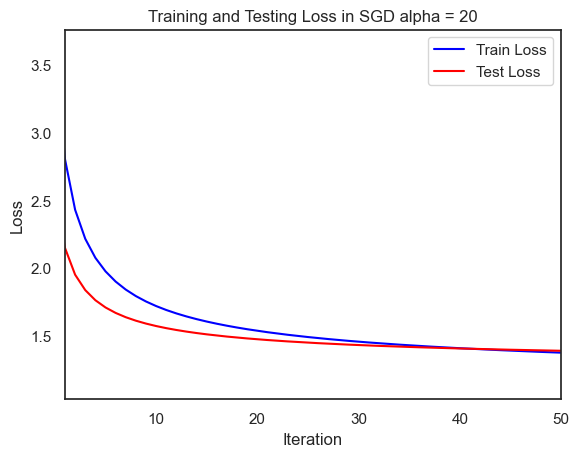

In [149]:
#SGD for Polynomial regression
#Define the SGDRegressor model
#Changing Alpha Values
sgd_al = [10,15,20]

X = df.drop(columns=['alcohol'])
Y = df['alcohol']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for a in sgd_al:
    # Define the SGDRegressor model
    sgd = SGDRegressor(alpha=a, max_iter=1000, random_state=42, eta0 = 0.1)

    # Initialize lists to record training and testing loss

    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):

        # Fit the model with one iteration of SGD
        sgd.partial_fit(X_train_poly, y_train)


        # Calculate training loss
        y_train_pred = sgd.predict(X_train_poly)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)

        # Calculate testing loss
        y_test_pred = sgd.predict(X_test_poly)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,50)
    #plt.ylim(1,10)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD alpha = {sgd.alpha}')
    plt.show()

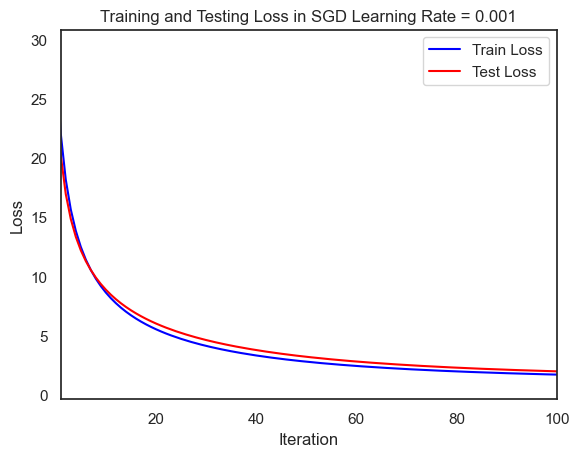

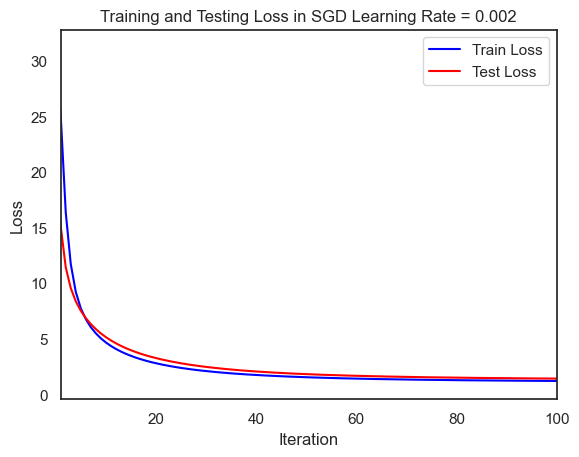

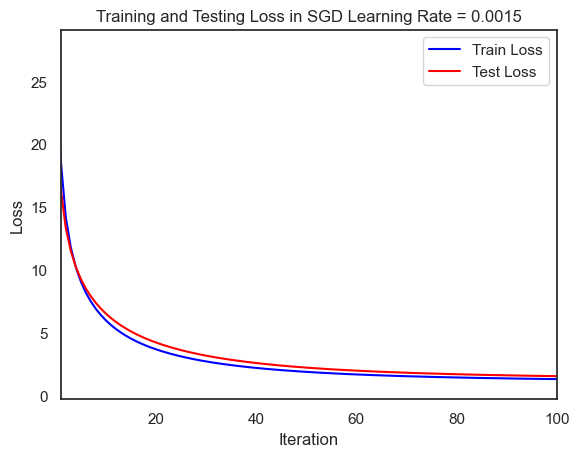

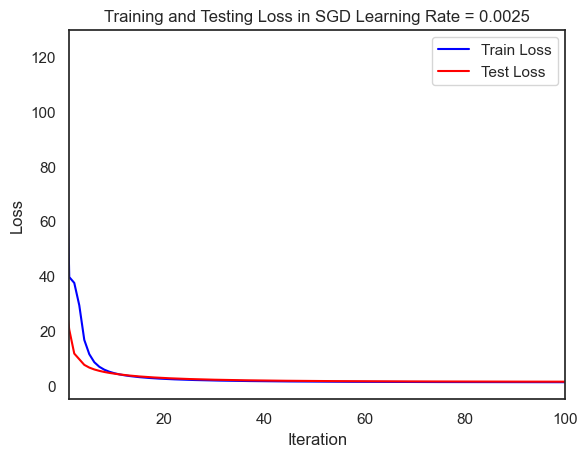

In [150]:
#SGD for Polynomial regression
#Define the SGDRegressor model
#Changing Learning Rate Values
sgd_eta= [0.001, 0.002, 0.0015, 0.0025]

X = df.drop(columns=['alcohol'])
Y = df['alcohol']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for a in sgd_eta:
    # Define the SGDRegressor model
    sgd = SGDRegressor(alpha=0.001, max_iter=1000, random_state=42, eta0 = a)

    # Initialize lists to record training and testing loss

    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):

        # Fit the model with one iteration of SGD
        sgd.partial_fit(X_train_poly, y_train)


        # Calculate training loss
        y_train_pred = sgd.predict(X_train_poly)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)

        # Calculate testing loss
        y_test_pred = sgd.predict(X_test_poly)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    #plt.ylim(1,10)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD Learning Rate = {sgd.eta0}')
    plt.show()

<H1>SGD Regression</H1>
<H3>
- While changing the alpha values in the SGD regression, the model is not well-generalized, as it is either over-fitting, or under-fitting, based on the value of alpha.<br>
- Similarly, while changing learning rate in the SGD rergression, the model comes close to being well-generalized for a learning rate of 0.0015, and for all the other learning rates, the polynomial model is not a good fit.
</H3>

In [151]:
#Ridge regression for Polynomial using cross validation
#Using the linear CV model

from sklearn.linear_model import RidgeCV

#Lasso Cross validation

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i], cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(X_train_poly, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(X_test_poly, y_test)))


RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.04149760549847514
The train score for ridge model is -0.0151716286205823

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.0414976054966022
The train score for ridge model is -0.015171581935850664

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.041497605309374186
The train score for ridge model is -0.01517111487162559

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.04149758665840164
The train score for ridge model is -0.015166422688227987

RidgeCV Model (alpha = 1)............................................

The train score for ridge model is 0.0414957899269186
The train score for ridge model is -0.015117489381393234

RidgeCV Model (alpha = 10)...........................................

In [152]:
#Lasso regression for Polynomial using cross validation
#Using the Lasso Cross Validation model

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Lasso model for different penalty values
for i in cv:
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(lasso_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(lasso_cv.score(X_test_poly, y_test)))


LassoCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.04149140753395575
The train score for lasso model is -0.014884057556744823

LassoCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.04108955619853627
The train score for lasso model is -0.01218767216708927

LassoCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.031265729024980815
The train score for lasso model is -0.000153278354505737

LassoCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.00047822534696551067

LassoCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.00047822534696551067

LassoCV Model (alpha = 10)............................................

The train score for l

In [153]:
#Elastic Net regression for Polynomial using cross validation
from sklearn.linear_model import ElasticNet

#Elastic Net Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elactic Net with different penalty values
for i in cv:
    print(f"\nElasticCV Model (alpha = {i})............................................\n")
    elastic_cv = ElasticNet(alpha = i).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(elastic_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(elastic_cv.score(X_test_poly, y_test)))


ElasticCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.04149585019241009
The train score for lasso model is -0.015023010886610733

ElasticCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.04135840188215589
The train score for lasso model is -0.013654301579338002

ElasticCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.03600091866803279
The train score for lasso model is -0.005478810120534083

ElasticCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.0053176995852044495
The train score for lasso model is 0.0022823083109545506

ElasticCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.00047822534696551067

ElasticCV Model (alpha = 10).......................................

<H1>G] Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.</H1>

In [155]:
#The linear regression model is a better fit for the Wine_Quality Data set.
#K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['alcohol'])
Y = df['alcohol']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

#4-fold cv 
# create model
model = LinearRegression()
mymodel = model.fit(x_train,y_train)
#evaluation metric is r2
scores = cross_val_score(mymodel, x_train, y_train, scoring='r2', cv=4)
scores
print('R2: %.3f' % np.mean(scores))
#evaluation metric - negative mean squared error
scores1 = -cross_val_score(mymodel, x_train, y_train, scoring='neg_mean_squared_error', cv=4)
scores1
print('MSE: %.3f' % np.mean(scores1))


R2: 0.652
MSE: 0.390


<H3>Linear Regression Model is a better model for this data set, as it is able to predict the model with a higher R2 score and a lower MSE score compared to the Polynomial Regression Model.</H3>

<H1>Future Work</H1>
<H3> 
- The model can be made better if we incluide a variety of attributes as to where the grapes for the wine come from, as it can help us identify which type of soil has a better impact on the alcohol content of the wine.
- In summary, the choice of hyperparameters, such as alpha (penalty term) and learning rate, had a significant impact on model performance across different regression techniques. Hyperparameter tuning is crucial for optimizing model performance for specific datasets.
- Polynomial model over-fits or underfits the data, where as the linear regression model generalizes the model properly.</H3>